In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [10]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding by using to_categoricaly method
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [11]:
#Building a 2D convloution Neural Network model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) #Using 32 Filters 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) #Kernel size used is (5,5) as some images are more than 128x128 megapixels 
model.add(MaxPool2D(pool_size=(2, 2))) #MaxPool is used to reduces the spatial dimensions
model.add(Dropout(rate=0.25)) #Droput helps to generalize the network and not overfit it
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) #We increase the filter size to 64 now
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu')) #relu activation is used so that the model can learn non linearly
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax')) #here softmax function is used as we are working with different classes of images and it helps easily indentifying the classes

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
epochs = 16
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/16
981/981 [==============================] - 66s 67ms/step - loss: 2.2342 - accuracy: 0.4157 - val_loss: 1.2728 - val_accuracy: 0.6401
Epoch 2/16
981/981 [==============================] - 70s 72ms/step - loss: 0.9120 - accuracy: 0.7319 - val_loss: 0.4162 - val_accuracy: 0.8921
Epoch 3/16
981/981 [==============================] - 71s 72ms/step - loss: 0.5365 - accuracy: 0.8412 - val_loss: 0.1825 - val_accuracy: 0.9462
Epoch 4/16
981/981 [==============================] - 68s 70ms/step - loss: 0.4190 - accuracy: 0.8773 - val_loss: 0.1263 - val_accuracy: 0.9620
Epoch 5/16
981/981 [==============================] - 69s 70ms/step - loss: 0.3272 - accuracy: 0.9028 - val_loss: 0.1340 - val_accuracy: 0.9638
Epoch 6/16
981/981 [==============================] - 69s 70ms/step - loss: 0.2926 - accuracy: 0.9155 - val_loss: 0.0815 - val_accuracy: 0.9769
Epoch 7/16
981/981 [==============================] - 68s 69ms/step - loss: 0.2676 - accuracy: 0.9251 - val_loss: 0.1213 - val_accuracy:

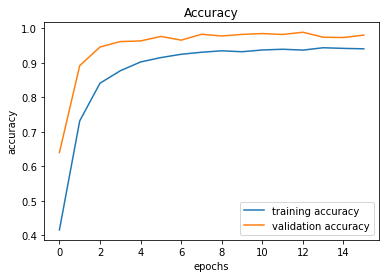

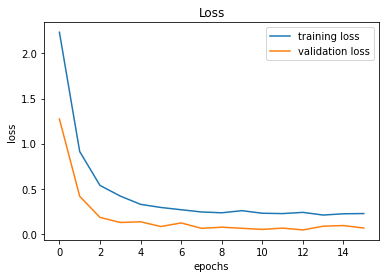

In [13]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


0.9394299287410927


In [17]:
model.save('traffic_Sign_classifier1.h5')